<a href="https://colab.research.google.com/github/Chojam/Database/blob/main/Week11_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQLite Pandas Examples

In [ ]:
import sqlite3 as sl
con = sl.connect('my-test.db')

In [ ]:
with con:
    con.execute("""
        CREATE TABLE USER (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            age INTEGER
            );
    """)

In [ ]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [ ]:
with con:
    con.executemany(sql, data)

In [ ]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age <= 22")
    for row in data:
      print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [ ]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id' : [1,1,2,2,3,3,3],
    'skill' : ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [ ]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
    SELECT s.user_id, u.name, u.age, s.skill
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [ ]:
df.to_sql('USER_SKILL', con)

# Using SQLite as Time Series Database

1. date (timestring, modifier, modifier, ...)
2. time (timestring, modifier, modifier, ...)
3. datetime (timestring, modifier, modifier, ...)
4. julianday (timestring, modifier, modifier, ...)
5. strftime (format, timestring, modifier, modifier, ...)


In [ ]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## 1. Connect to database
It was mentioned before the demo.db3 is extracted from a hydrological modeling. As a result, the data in each table is tidy and complete without NULL values. However, we can creat a table with NULL values for demo

In [ ]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

## 2. Play with date and time functions


**Compute the current date**

In [ ]:
%sql SELECT data('now');

 * sqlite:///demo.db3
(sqlite3.OperationalError) no such function: data
[SQL: SELECT data('now');]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


**Compute the last day of the current month**

In [ ]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day');

 * sqlite:///demo.db3
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


#3. Create a table of tiem series temperature

**3.1 Create table only with two columns of timestamp and Temperature**

In [ ]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

**3.2 Create an index: For efficient querying, we'll want to index the timestamp column**

1.   List item
2.   List item



In [ ]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

**3.3 Insert data: Make 500 rows of data and temperature ranges between 18 to 26**


In [ ]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows -i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

#4. Play with time series table

**4.1 Simple Query**

In [ ]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: SELECT datetime(Timestamp) as Date, Temperature FROM Temperature FROM Temperature LIMIT 5]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


**4.2 Filter with a datetime**

In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:40:34.141623,23.733560321253705
2021-06-28 09:26:31.740645,18.29986419671218
2021-06-28 09:27:01.642288,21.024356756160294
2021-06-28 09:40:34.141623,18.590728132231735
2021-06-29 09:40:34.141623,25.357188190677245
2021-06-30 09:40:34.141623,20.19703953170392
2021-07-01 09:40:34.141623,24.719130045124174
2021-07-02 09:40:34.141623,23.238354581908233
2021-07-03 09:40:34.141623,24.79645112311377
2021-07-04 09:40:34.141623,23.714405120173012


**4.3 Query data at a specific year Use CAST string to integer as strftime returns a string.**

In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-06-28 09:26:31.740645,18.29986419671218
2021-06-28 09:27:01.642288,21.024356756160294
2021-06-27 09:40:34.141623,23.733560321253705
2021-06-28 09:40:34.141623,18.590728132231735
2021-06-29 09:40:34.141623,25.357188190677245
2021-06-30 09:40:34.141623,20.19703953170392
2021-07-01 09:40:34.141623,24.719130045124174
2021-07-02 09:40:34.141623,23.238354581908233
2021-07-03 09:40:34.141623,24.79645112311377
2021-07-04 09:40:34.141623,23.714405120173012


**4.5 Aggregate yearly**

In [ ]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
        AVG (Temperature) AS MEAN_TMP,
        MAX (Temperature) AS MAX_TMP,
        MIN (Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime ('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.243888622385608,25.978494354440716,18.048778949850156
2022,21.91685672117327,25.98176578538419,18.000158008053525


#5. Visuaiization

In [ ]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-28 09:26:31', '2021-06-28 09:27:01',
               '2021-06-27 09:40:34', '2021-06-28 09:40:34',
               '2021-06-29 09:40:34', '2021-06-30 09:40:34',
               '2021-07-01 09:40:34', '2021-07-02 09:40:34',
               '2021-07-03 09:40:34', '2021-07-04 09:40:34',
               ...
               '2022-10-30 09:40:34', '2022-10-31 09:40:34',
               '2022-11-01 09:40:34', '2022-11-02 09:40:34',
               '2022-11-03 09:40:34', '2022-11-04 09:40:34',
               '2022-11-05 09:40:34', '2022-11-06 09:40:34',
               '2022-11-07 09:40:34', '2022-11-08 09:40:34'],
              dtype='datetime64[ns]', name='date', length=502, freq=None)

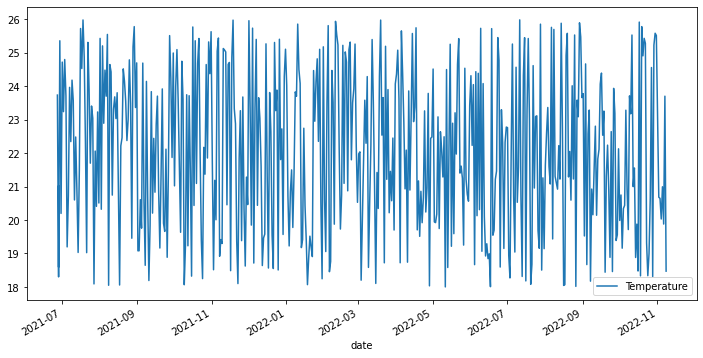

In [ ]:
df.plot(figsize=(12,6))